In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from capstone_dayne import load_data, preprocess, build_regression_model


In [4]:
num_df, qual_df, tag_df, full_data = load_data("rmpCapstoneNum.csv", "rmpCapstoneQual.csv", "rmpCapstoneTags.csv")
processed_df, (male_df, female_df), df_thres, (male_df_thres, female_df_thres) = preprocess(full_data, thres=4)

In [5]:
full_data.isna().sum()

average_ratings                          19889
average_difficulty                       19889
num_ratings                              19889
is_received_pepper                       19889
prop_take_again                          77733
num_ratings_online                       19889
is_male                                      0
is_female                                    0
Tough grader                                 0
Good feedback                                0
Respected                                    0
Lots to read                                 0
Participation matters                        0
Don't skip class or you will not pass        0
Lots of homework                             0
Inspirational                                0
Pop quizzes!                                 0
Accessible                                   0
So many papers                               0
Clear grading                                0
Hilarious                                    0
Test heavy   

In [6]:
processed_df.isna().sum()

average_ratings                              0
average_difficulty                           0
num_ratings                                  0
is_received_pepper                           0
prop_take_again                          43240
num_ratings_online                           0
is_male                                      0
is_female                                    0
Tough grader                                 0
Good feedback                                0
Respected                                    0
Lots to read                                 0
Participation matters                        0
Don't skip class or you will not pass        0
Lots of homework                             0
Inspirational                                0
Pop quizzes!                                 0
Accessible                                   0
So many papers                               0
Clear grading                                0
Hilarious                                    0
Test heavy   

In [7]:
len(full_data), len(processed_df), len(df_thres)

(89893, 52089, 23281)

In [8]:
len(male_df), len(female_df), len(male_df_thres), len(female_df_thres)

(27163, 24926, 12463, 10818)

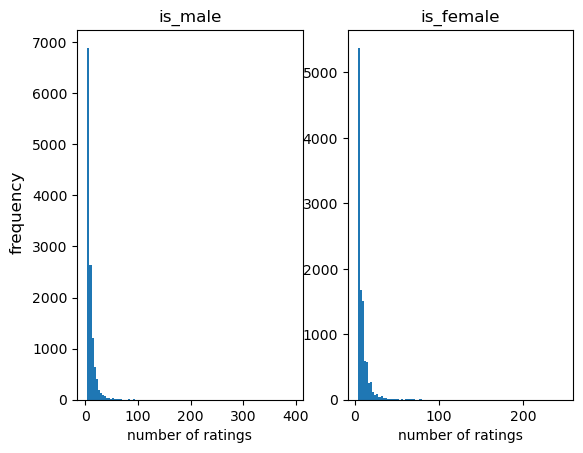

In [9]:
fig, axes = plt.subplots(1, 2)
fig.supylabel("frequency")
axes[0].hist(male_df_thres["num_ratings"], bins=100)
axes[0].set_title("is_male")
axes[0].set_xlabel("number of ratings")

axes[1].hist(female_df_thres["num_ratings"], bins=100)
axes[1].set_title("is_female")
axes[1].set_xlabel("number of ratings")

plt.show()

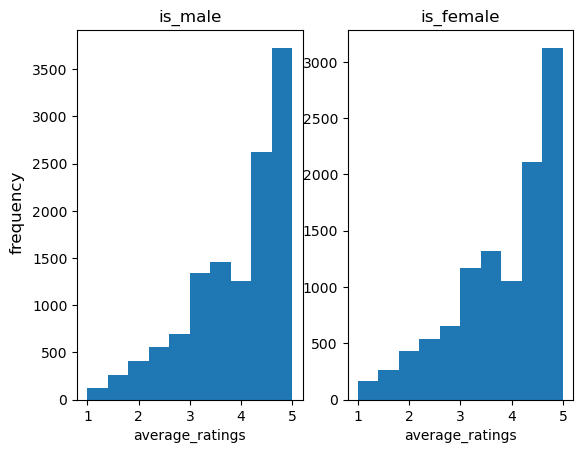

In [10]:
fig, axes = plt.subplots(1, 2)
fig.supylabel("frequency")
axes[0].hist(male_df_thres["average_ratings"], bins=10)
axes[0].set_title("is_male")
axes[0].set_xlabel("average_ratings")

axes[1].hist(female_df_thres["average_ratings"], bins=10)
axes[1].set_title("is_female")
axes[1].set_xlabel("average_ratings")
plt.show()

In [11]:
processed_tag_df = processed_df[tag_df.columns]

processed_tag_df[tag_df.columns[0]].value_counts()

Tough grader
0      32696
1       9637
2       4077
3       2032
4       1204
5        745
6        469
7        302
8        228
9        148
10       114
11        82
12        73
13        49
14        41
15        39
17        32
16        26
18        13
20        11
19        11
26         8
21         7
28         4
22         4
29         4
24         4
27         4
36         3
23         3
30         3
39         2
49         2
33         2
31         1
32         1
63         1
42         1
43         1
44         1
112        1
52         1
25         1
53         1
Name: count, dtype: int64

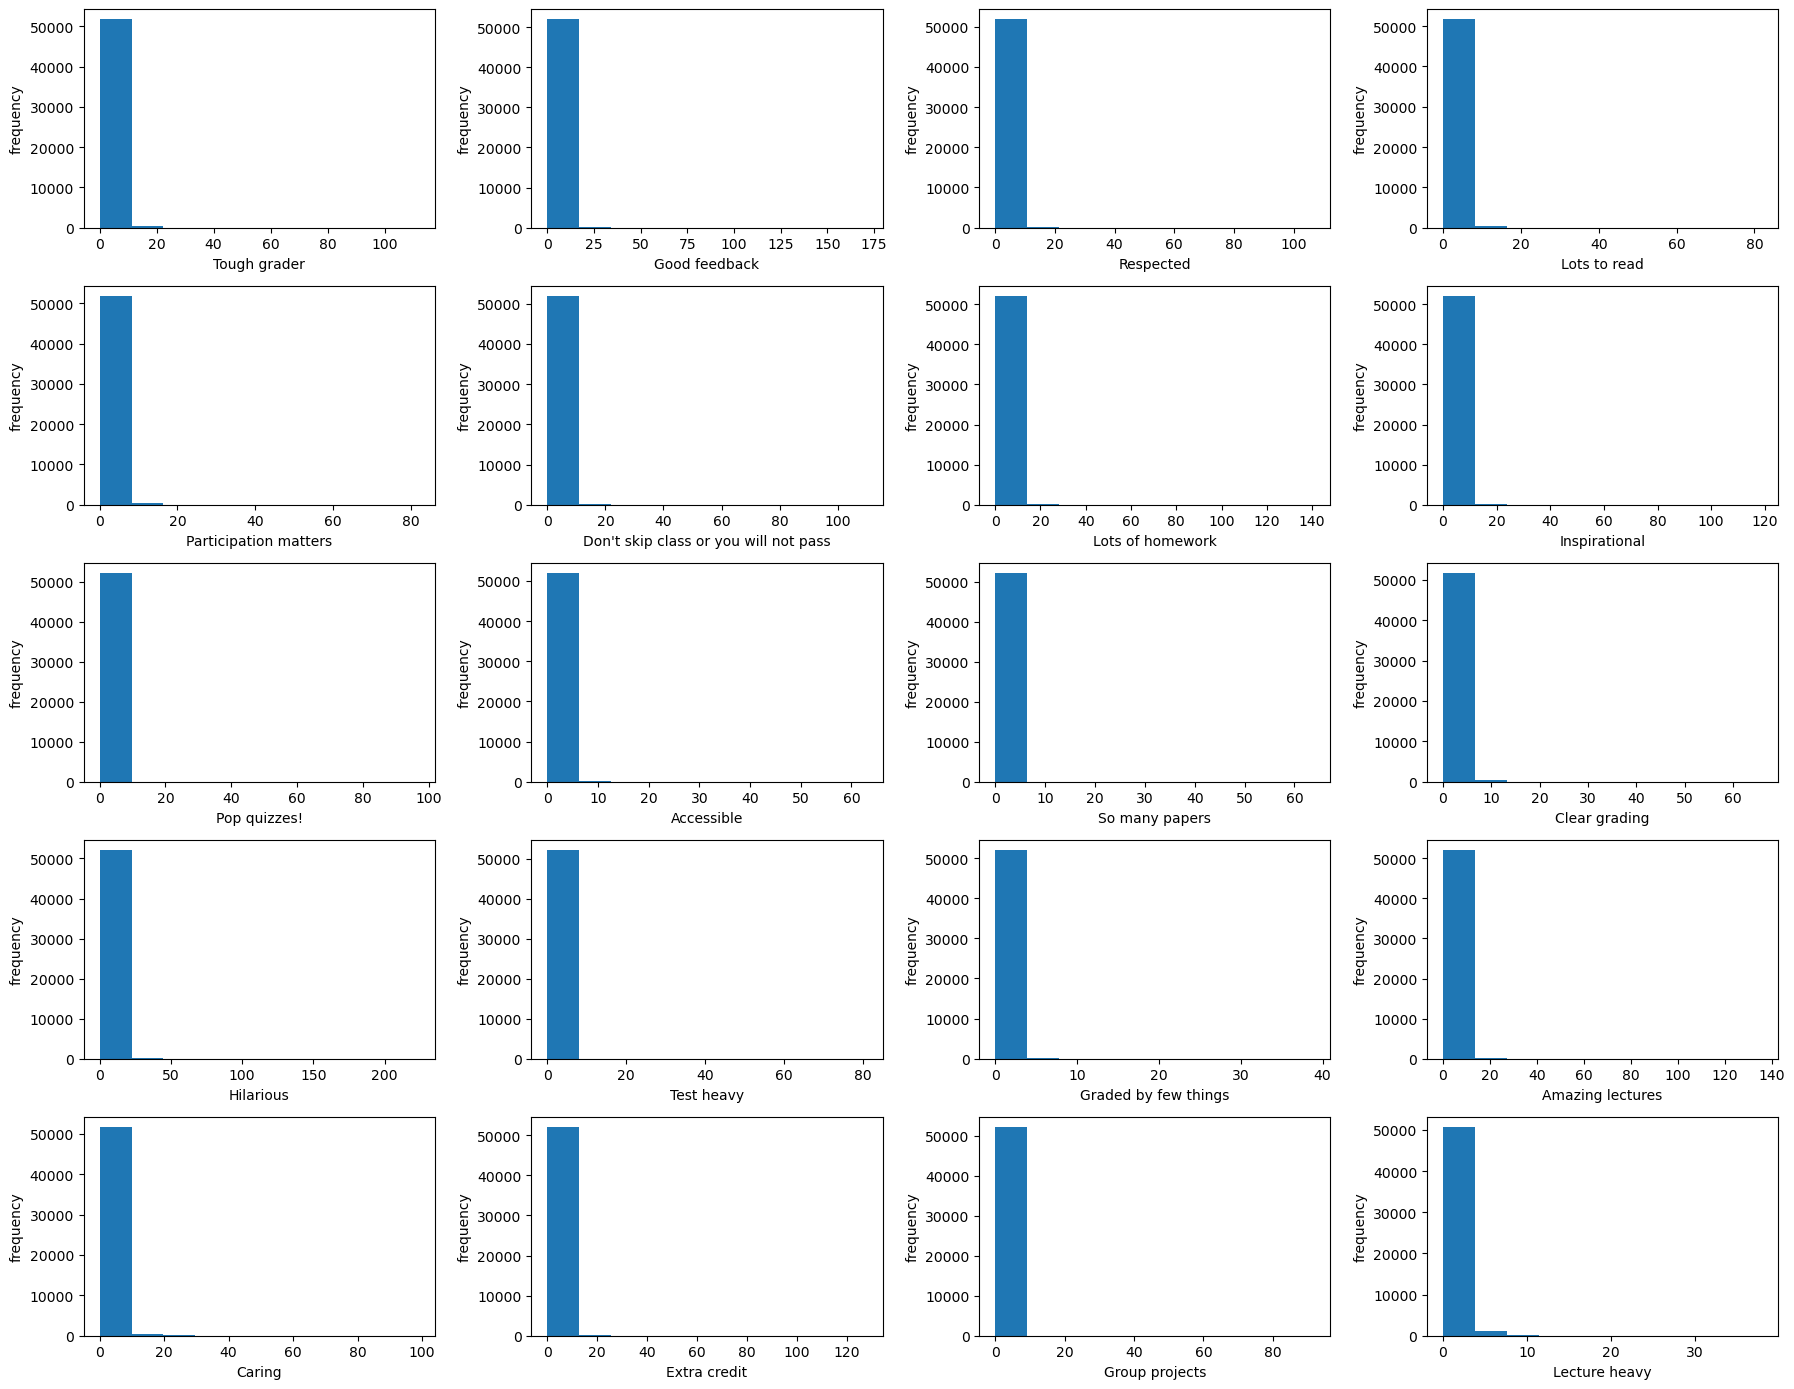

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 14))  # 5 rows x 4 columns to fit 20 columns
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create a histogram for each column
for i, column in enumerate(processed_tag_df.columns):
    axes[i].hist(processed_tag_df[column], bins=10)
    axes[i].set_xlabel(column)  # Label x-axis
    axes[i].set_ylabel("frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

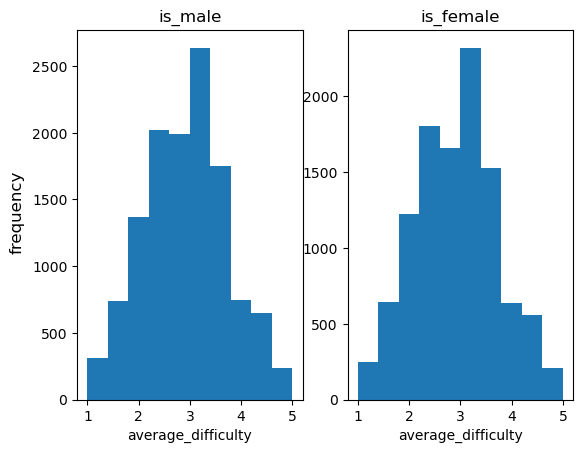

In [13]:
fig, axes = plt.subplots(1, 2)
fig.supylabel("frequency")
axes[0].hist(male_df_thres["average_difficulty"], bins=10)
axes[0].set_title("is_male")
axes[0].set_xlabel("average_difficulty")

axes[1].hist(female_df_thres["average_difficulty"], bins=10)
axes[1].set_title("is_female")
axes[1].set_xlabel("average_difficulty")
plt.show()

In [14]:
num_df_thres = df_thres[num_df.columns]

num_df_thres.isna().sum()

average_ratings           0
average_difficulty        0
num_ratings               0
is_received_pepper        0
prop_take_again       14432
num_ratings_online        0
is_male                   0
is_female                 0
dtype: int64

In [15]:
len(num_df_thres), len(num_df_thres.dropna())

(23281, 8849)

In [16]:
num_df_thres["prop_take_again"].value_counts()

prop_take_again
100.0    3077
80.0      541
83.0      393
60.0      347
67.0      329
         ... 
26.0        2
48.0        2
12.0        2
32.0        2
4.0         1
Name: count, Length: 94, dtype: int64

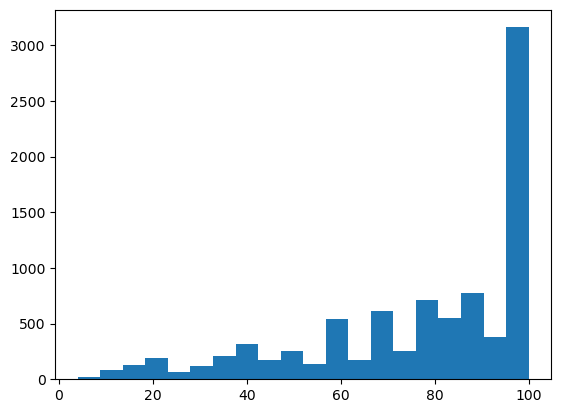

In [17]:
plt.hist(num_df_thres["prop_take_again"], bins=20)
plt.show()

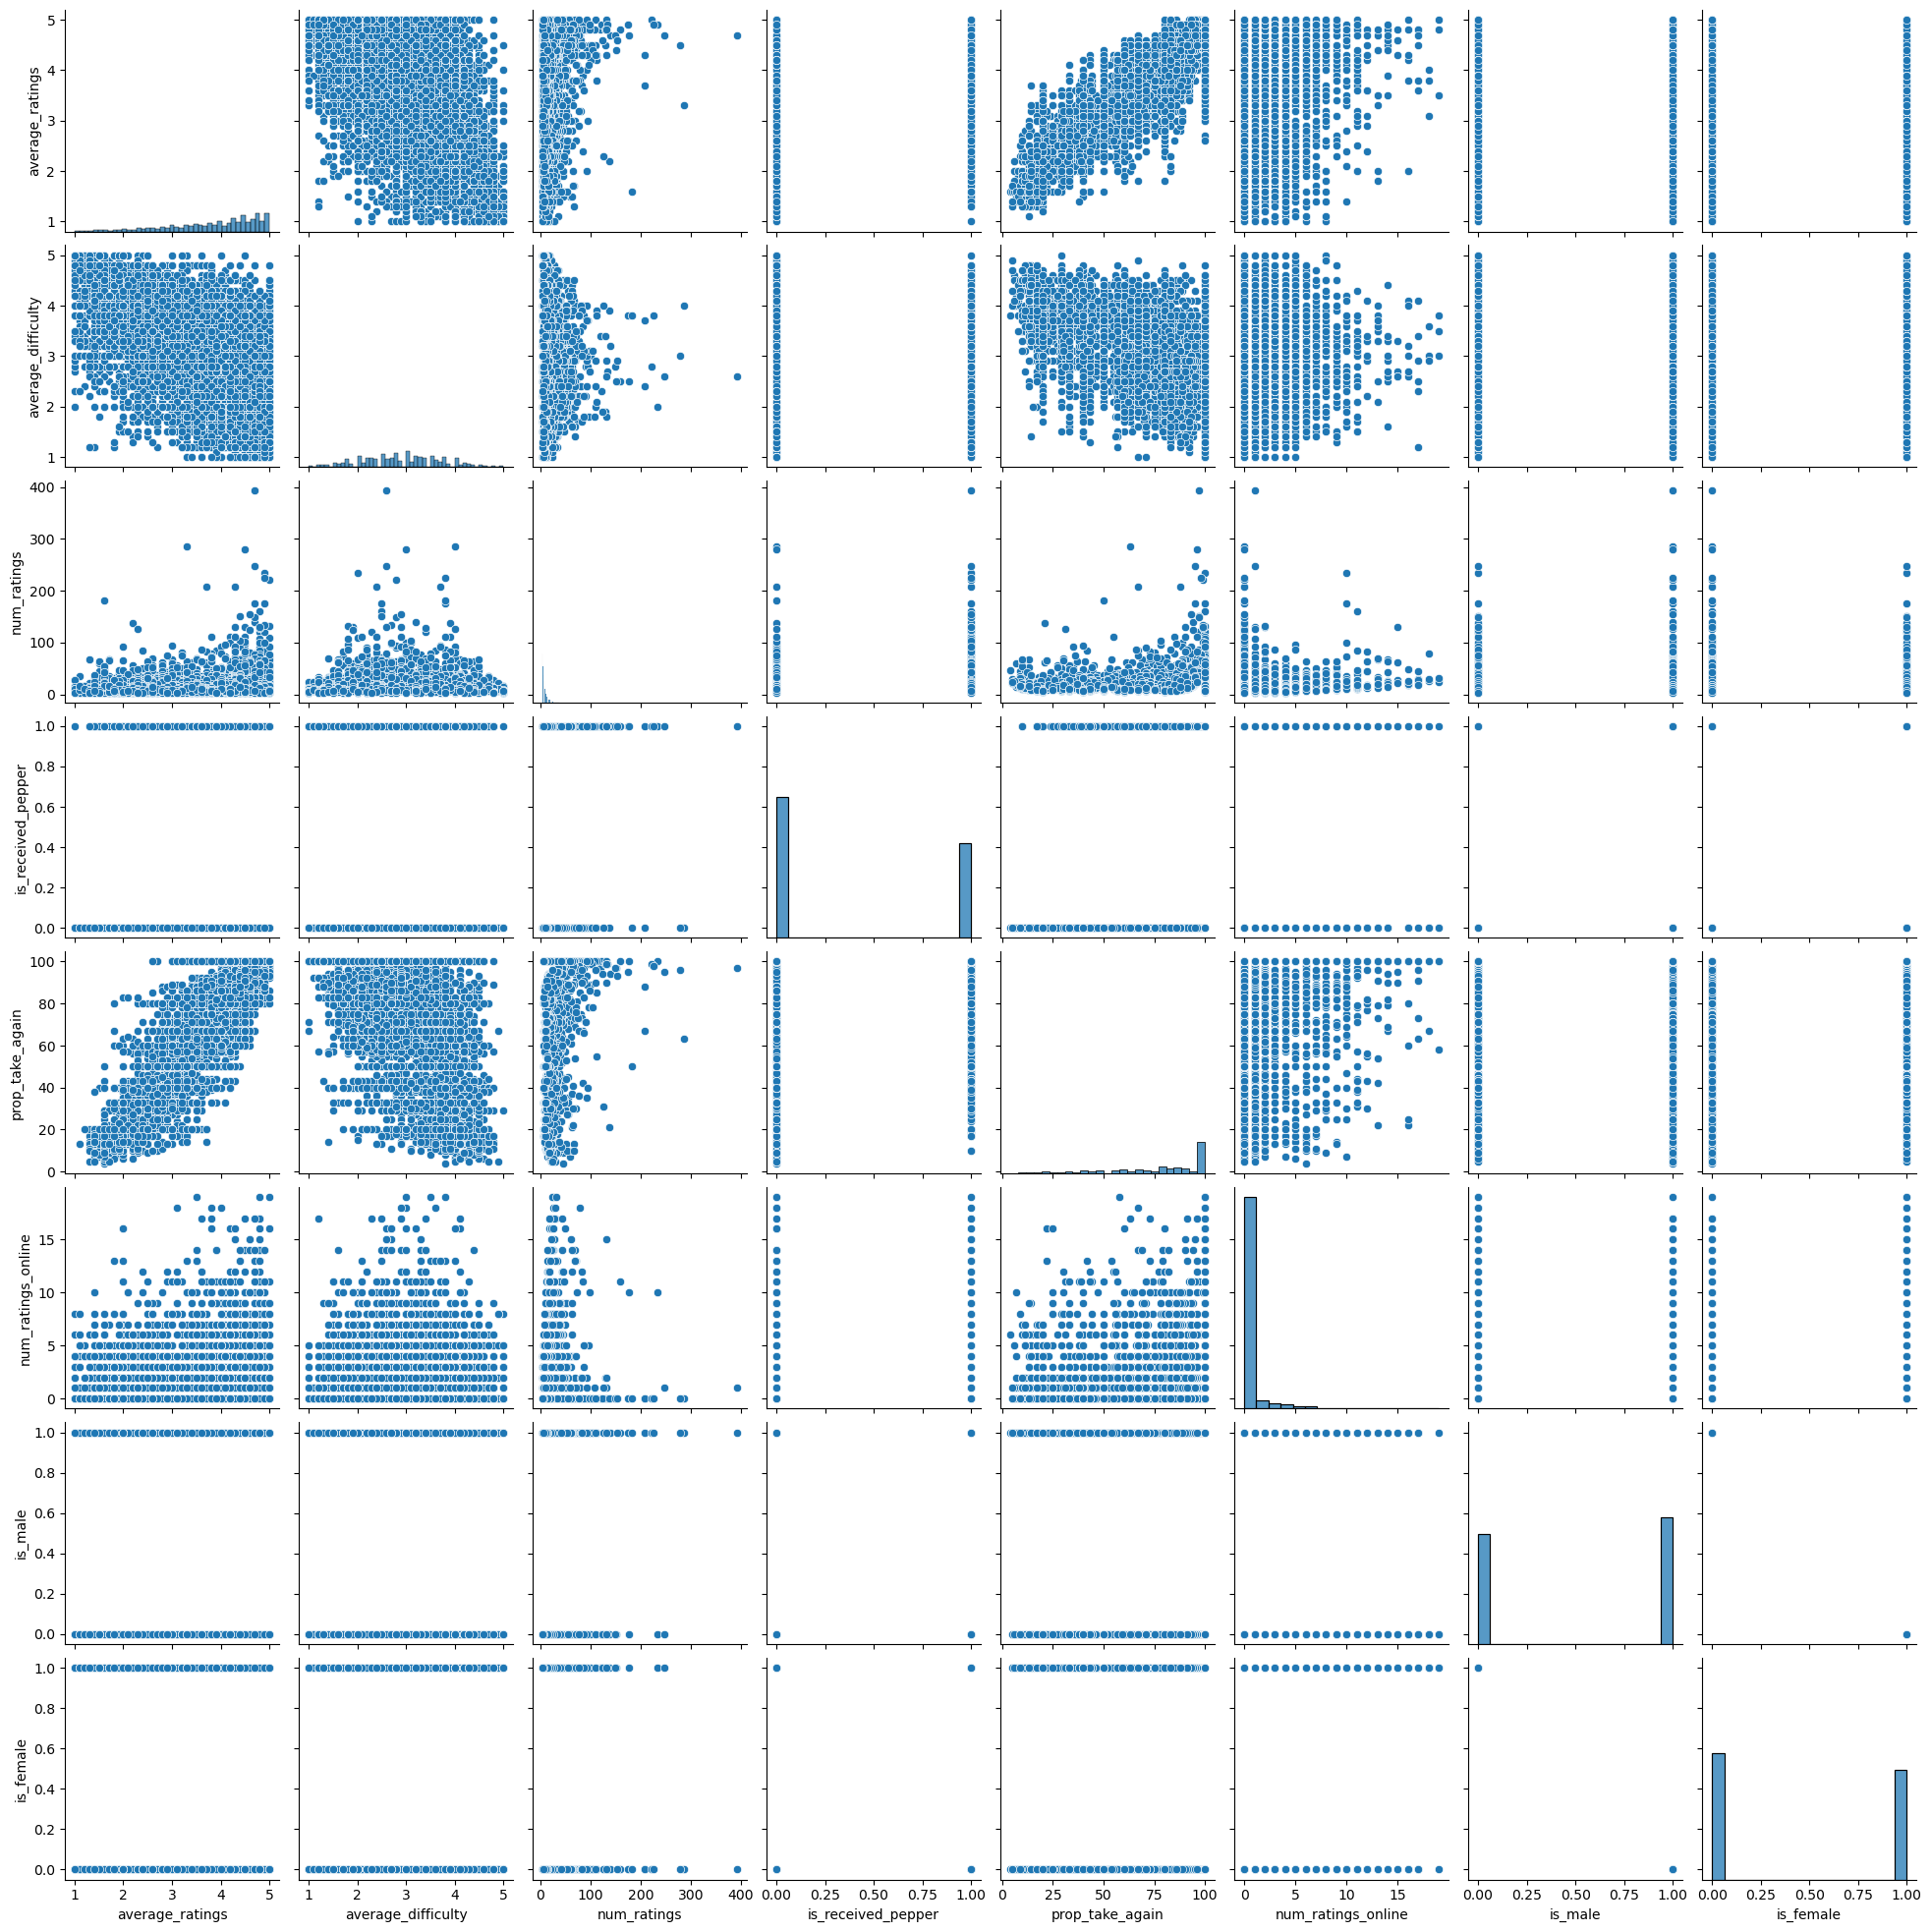

In [18]:
sns.pairplot(num_df_thres)

In [19]:
na_dropped_num_df_thres = num_df_thres.dropna()

len(na_dropped_num_df_thres)

8849

In [20]:
na_dropped_num_df_thres.isna().sum()

average_ratings       0
average_difficulty    0
num_ratings           0
is_received_pepper    0
prop_take_again       0
num_ratings_online    0
is_male               0
is_female             0
dtype: int64

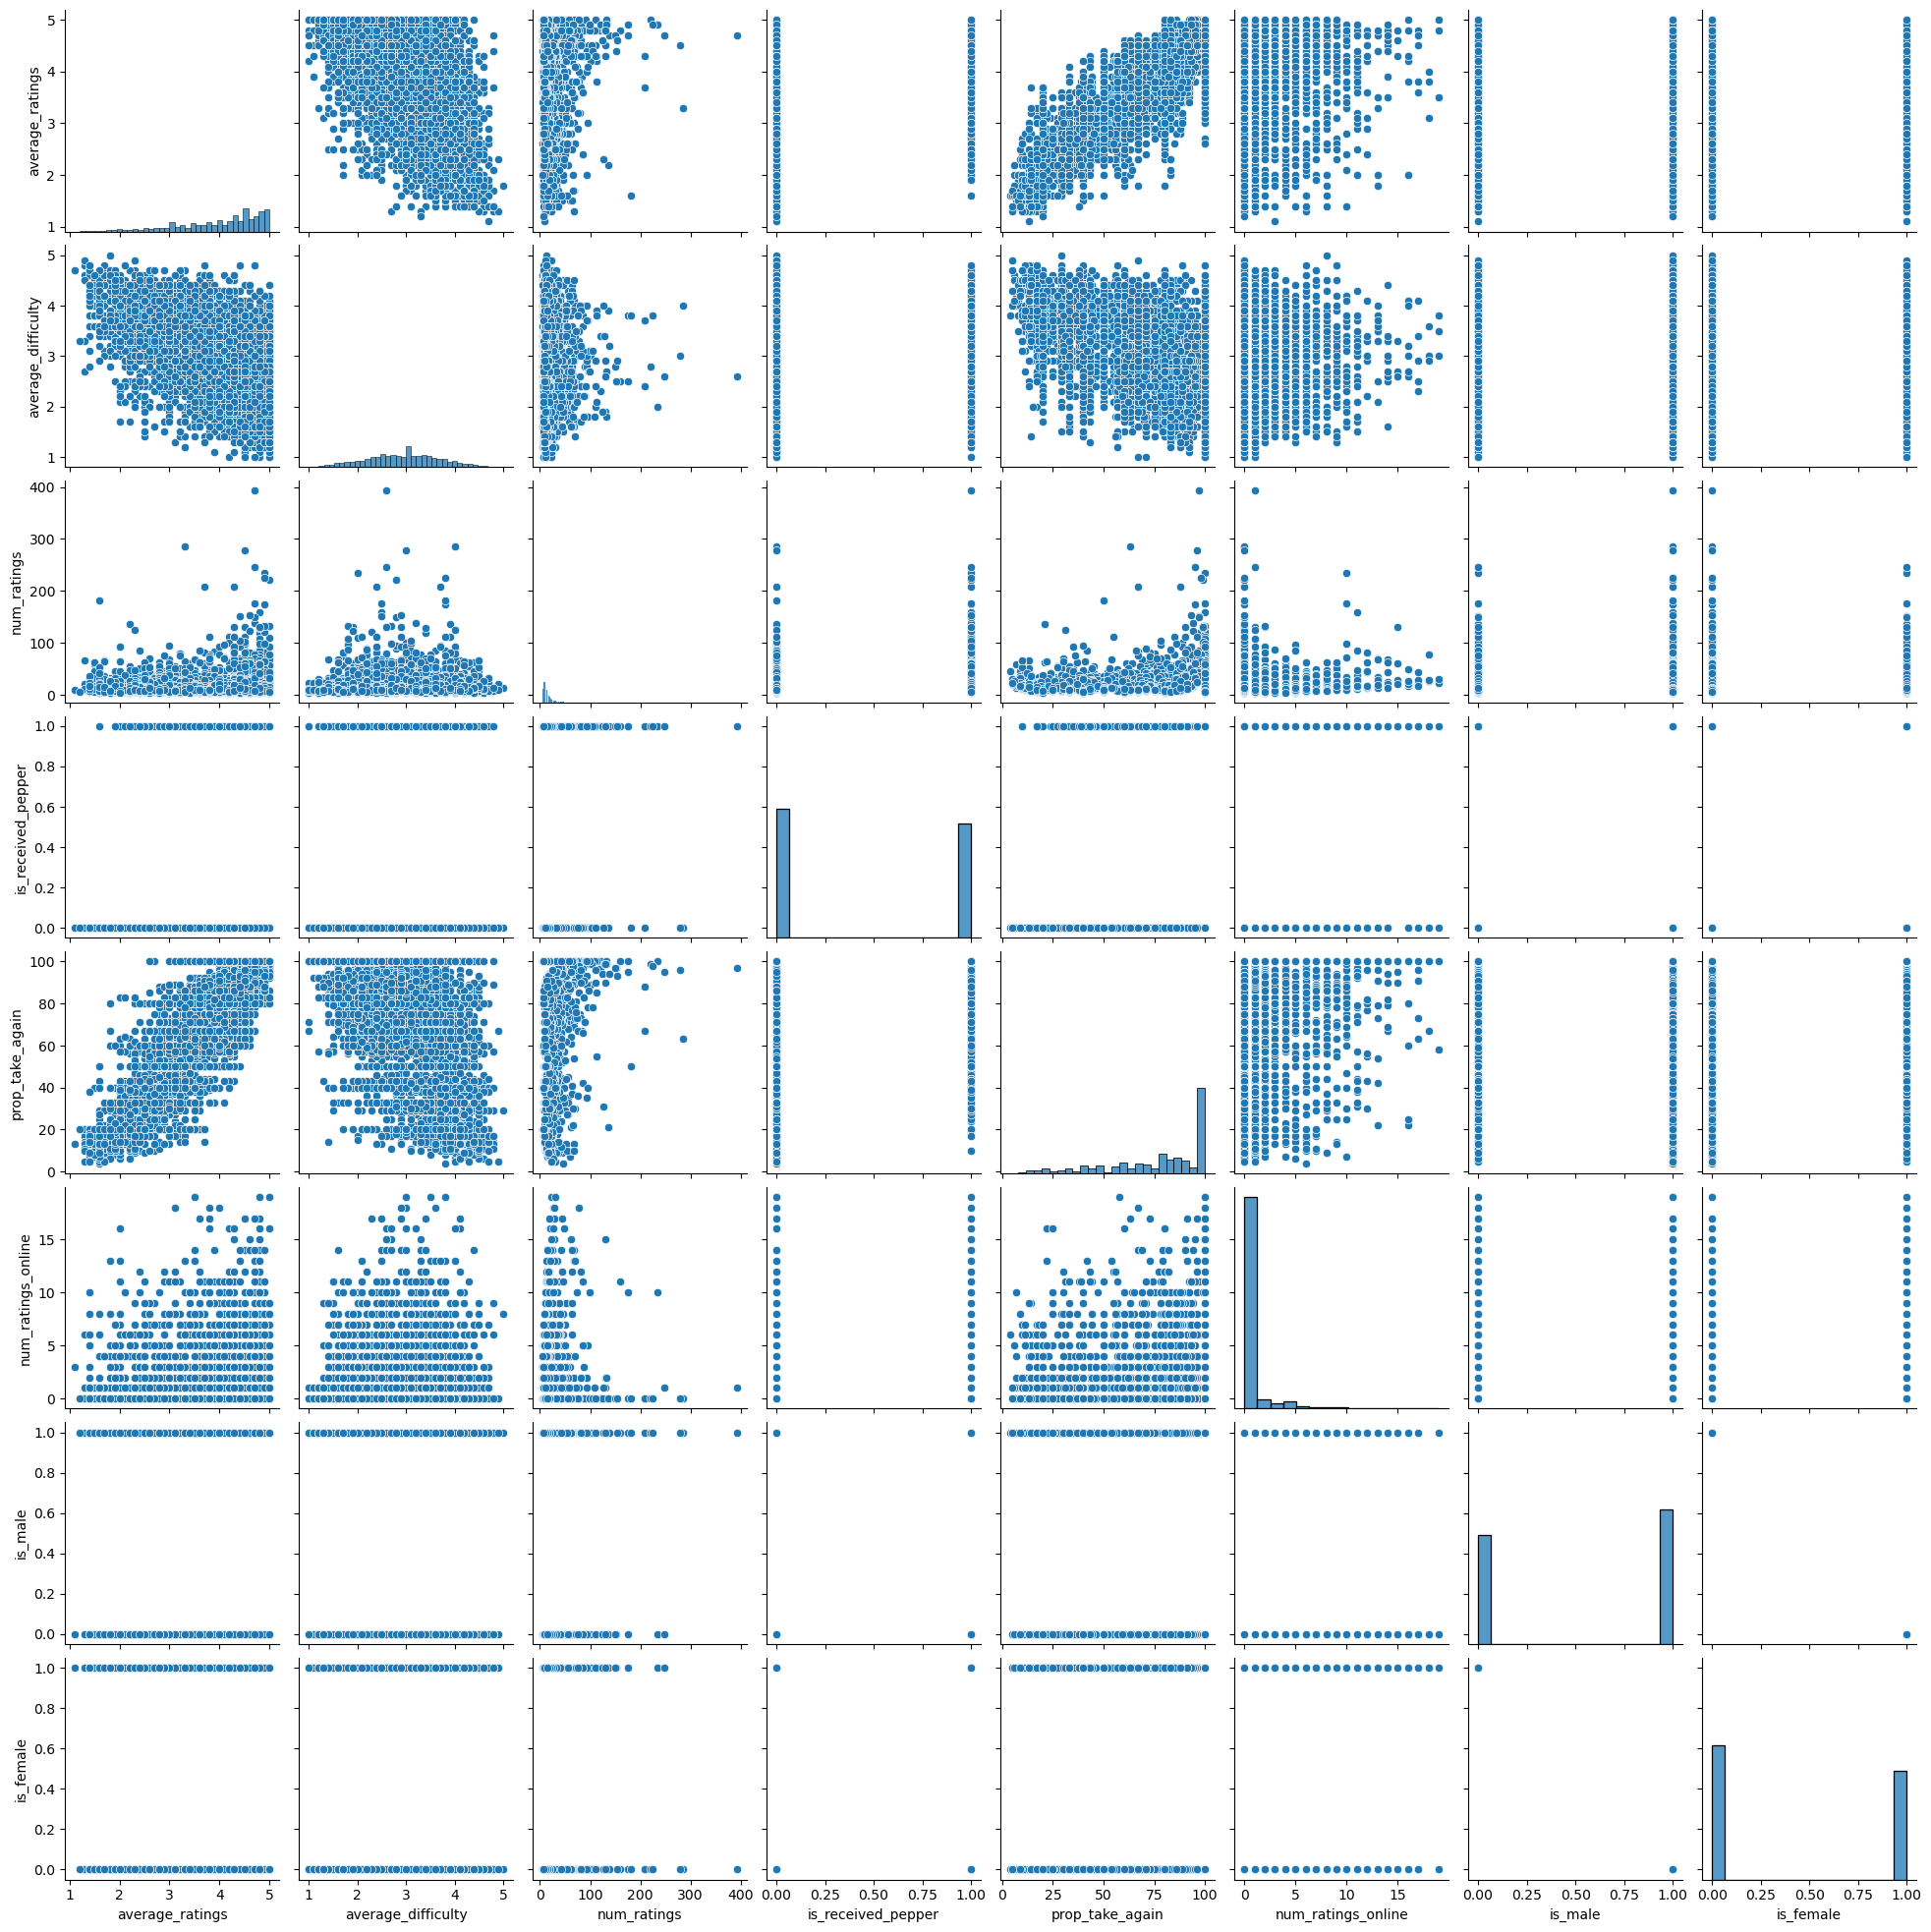

In [21]:
sns.pairplot(na_dropped_num_df_thres)

<Axes: >

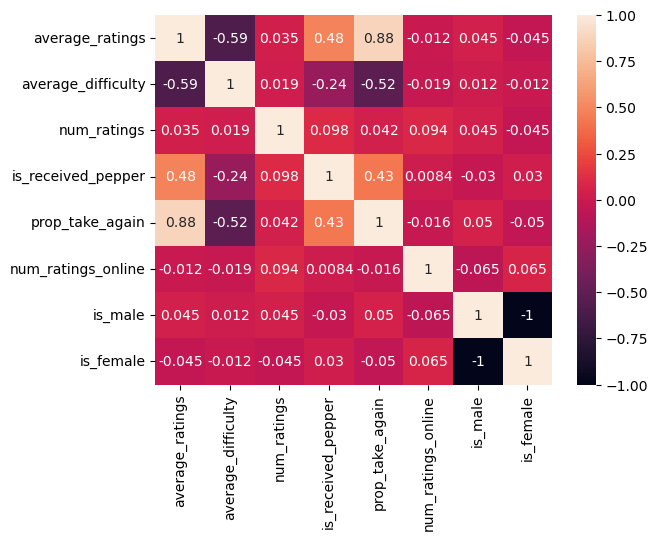

In [22]:
correlation_mat = na_dropped_num_df_thres.corr()

sns.heatmap(correlation_mat, annot=True)

In [23]:
# handle dummy variable trap (is_female)

X = na_dropped_num_df_thres.drop(columns=["is_female", "prop_take_again"]).to_numpy()
y = na_dropped_num_df_thres["prop_take_again"].to_numpy()

model, rmse, _, feature_scaler = build_regression_model(X, y, test_size=0.2)
model, rmse

(Lasso(alpha=0.07), 11.552338419505173)

In [24]:
# impute data

X = num_df_thres.drop(columns=["is_female", "prop_take_again"])[num_df_thres["prop_take_again"].isna()].to_numpy()
y_pred = model.predict(feature_scaler.transform(X))
imputed_num_df_thres = num_df_thres.copy(deep=True)
imputed_num_df_thres.loc[imputed_num_df_thres["prop_take_again"].isnull(), "prop_take_again"] = y_pred

In [25]:
na_dropped_num_df_thres.head()

,average_ratings,average_difficulty,num_ratings,is_received_pepper,prop_take_again,num_ratings_online,is_male,is_female
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0
25,4.3,3.3,16.0,1.0,83.0,0.0,0,1
40,1.8,3.8,15.0,0.0,22.0,1.0,0,1
42,4.1,3.3,21.0,0.0,67.0,0.0,0,1
46,4.2,1.8,26.0,1.0,57.0,8.0,1,0


In [26]:
imputed_num_df_thres.head()


,average_ratings,average_difficulty,num_ratings,is_received_pepper,prop_take_again,num_ratings_online,is_male,is_female
2,3.2,3.0,4.0,0.0,57.112700,0.0,1,0
5,3.5,3.3,22.0,0.0,56.000000,7.0,1,0
21,2.6,4.1,10.0,0.0,41.641878,0.0,1,0
25,4.3,3.3,16.0,1.0,83.000000,0.0,0,1
27,4.1,1.8,8.0,0.0,79.984043,0.0,0,1


In [27]:
X = na_dropped_num_df_thres.drop(columns=["is_female", "average_ratings"])
y = na_dropped_num_df_thres["average_ratings"]
rating_model1, rmse, r2, _ = build_regression_model(X, y)

rating_model1, rmse, r2

(Lasso(alpha=0.01), 0.36524674656066297, 0.8002952154249313)

In [28]:
features = list(zip(rating_model1.coef_, X.columns))
features.sort(key=lambda f: f[0], reverse=True)

features


[(0.615830059612299, 'prop_take_again'),
 (0.0898789539011963, 'is_received_pepper'),
 (0.0, 'num_ratings'),
 (-0.0, 'num_ratings_online'),
 (0.0, 'is_male'),
 (-0.14442072033430678, 'average_difficulty')]

In [29]:
X = imputed_num_df_thres.drop(columns=["is_female", "average_ratings"])
y = imputed_num_df_thres["average_ratings"]
rating_model2, rmse, r2, _ = build_regression_model(X, y)

rating_model2, rmse, r2

(Lasso(alpha=0.01), 0.25439616418015165, 0.9283493842961684)

In [30]:
features = list(zip(rating_model2.coef_, X.columns))
features.sort(key=lambda f: f[0], reverse=True)

features

[(0.8641657468096047, 'prop_take_again'),
 (0.020189588651282606, 'is_received_pepper'),
 (-0.0, 'num_ratings'),
 (-0.0, 'num_ratings_online'),
 (-0.0, 'is_male'),
 (-0.06170767555498961, 'average_difficulty')]

In [31]:
tag_X = processed_tag_df
tag_y = processed_df["average_ratings"]

rating_model_tag, rmse, r2, _ =  build_regression_model(tag_X, tag_y)
rating_model_tag, rmse, r2


(Lasso(alpha=0.01), 1.0098293356564503, 0.16381058114197877)

In [32]:
features = list(zip(rating_model_tag.coef_, X.columns))
features.sort(key=lambda f: f[0], reverse=True)

features

[(0.16690294732994232, 'num_ratings'),
 (0.032545403837475465, 'is_received_pepper'),
 (0.0027166311001782704, 'is_male'),
 (0.0, 'num_ratings_online'),
 (-0.001144539249251949, 'prop_take_again'),
 (-0.27667324166710655, 'average_difficulty')]

In [33]:
tag_X = df_thres[tag_df.columns]
tag_y = df_thres["average_ratings"]

rating_model_tag, rmse, r2, _ =  build_regression_model(tag_X, tag_y)
rating_model_tag, rmse, r2

(Lasso(alpha=0.03), 0.7634384299872821, 0.3547220205899916)

In [34]:
df_thres.head()

,average_ratings,average_difficulty,num_ratings,is_received_pepper,prop_take_again,num_ratings_online,is_male,is_female,Tough grader,Good feedback,...,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy,Major,University,State
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,2,1,...,0,0,0,0,0,0,0,English,Alabama State University,AL
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0,8,13,...,0,0,0,3,0,1,3,English,Eastern Florida State College,FL
21,2.6,4.1,10.0,0.0,NaN,0.0,1,0,4,3,...,0,0,1,1,0,5,1,Management,University of Alabama,AL
25,4.3,3.3,16.0,1.0,83.0,0.0,0,1,6,5,...,0,0,2,10,0,0,1,English,Concordia University,QC
27,4.1,1.8,8.0,0.0,NaN,0.0,0,1,0,3,...,0,0,0,2,0,0,0,Education,Mount Royal University,AB


<Axes: >

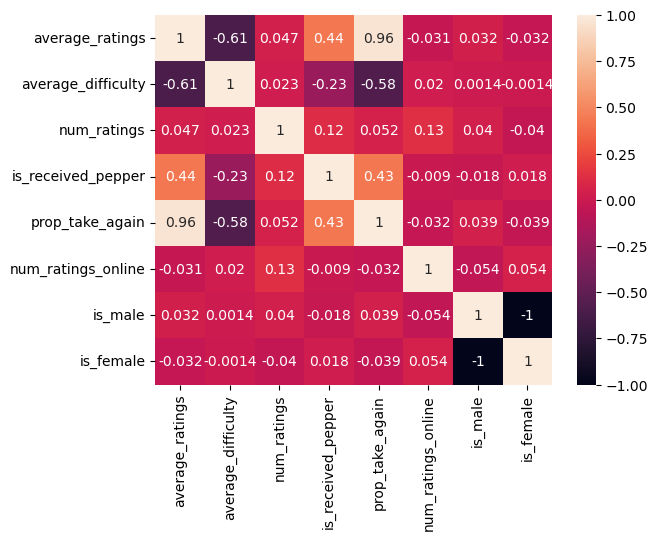

In [35]:
# correlation matrix after imputing missing values for "prop_take_again"

corr_mat = imputed_num_df_thres.corr()
sns.heatmap(corr_mat, annot=True)